### **Outlier Detection Using IQR**

![image](boxolot.png)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('C:/Users/Acer/OneDrive/Documents/MACLEARNING/machinelearning/data/advertising.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [4]:
data=data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']]

In [5]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,68.95,35,61833.90,256.09
1,80.23,31,68441.85,193.77
2,69.47,26,59785.94,236.50
3,74.15,29,54806.18,245.89
4,68.37,35,73889.99,225.58


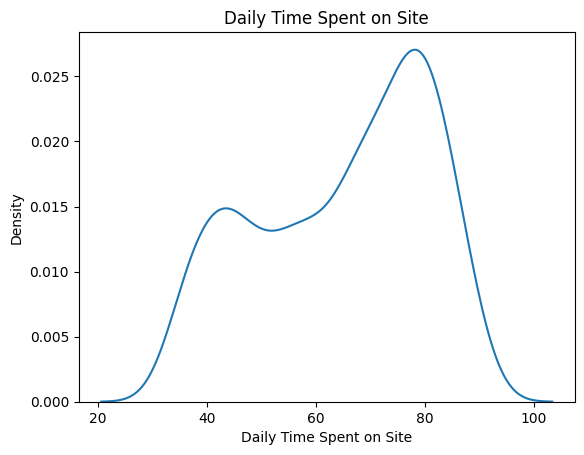

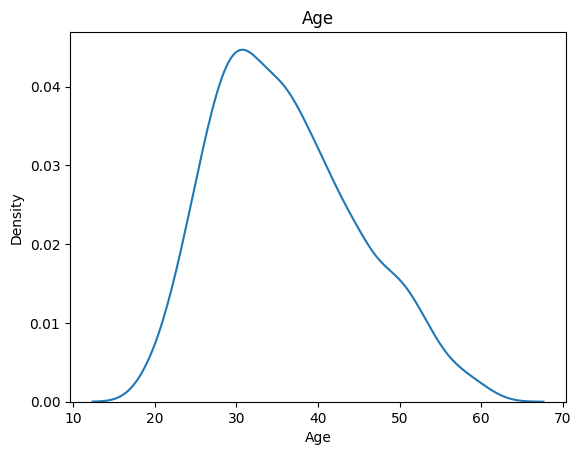

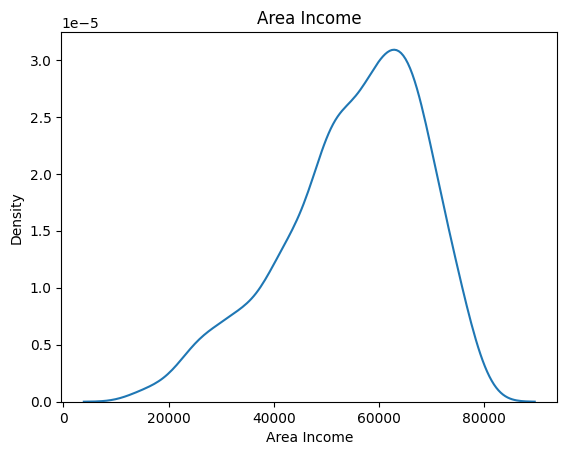

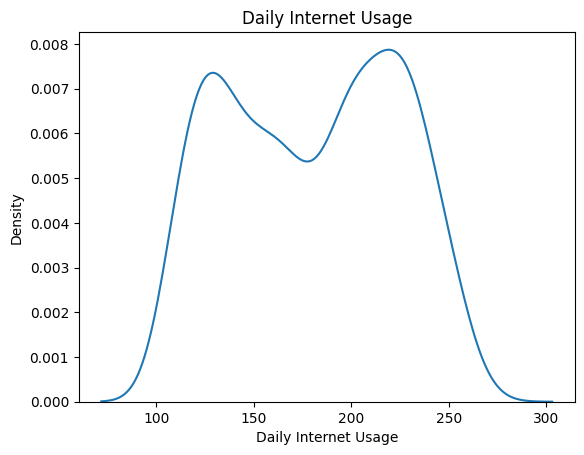

In [6]:

def distribution(data,col_name):
    sns.kdeplot(data,x=col_name)
    plt.title(f'{col_name}')
    plt.show()
cols_name=['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']
for col_name in cols_name:
    distribution(data,col_name)

Here are income and age are both skewed datasets so we will use IQR method to find the outliers in the datasets.

In [7]:
skew_cols=['Age','Area Income']
for col in skew_cols:
    print(data[col].skew)

<bound method Series.skew of 0      35
1      31
2      26
3      29
4      35
       ..
995    30
996    45
997    51
998    19
999    26
Name: Age, Length: 1000, dtype: int64>
<bound method Series.skew of 0      61833.90
1      68441.85
2      59785.94
3      54806.18
4      73889.99
         ...   
995    71384.57
996    67782.17
997    42415.72
998    41920.79
999    29875.80
Name: Area Income, Length: 1000, dtype: float64>


<Axes: >

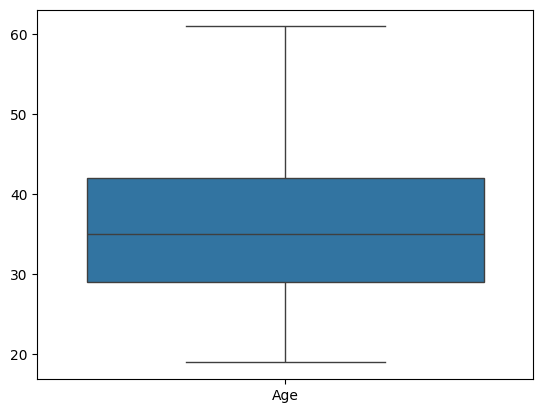

In [8]:
sns.boxplot(data=data[['Age']])

<Axes: ylabel='Area Income'>

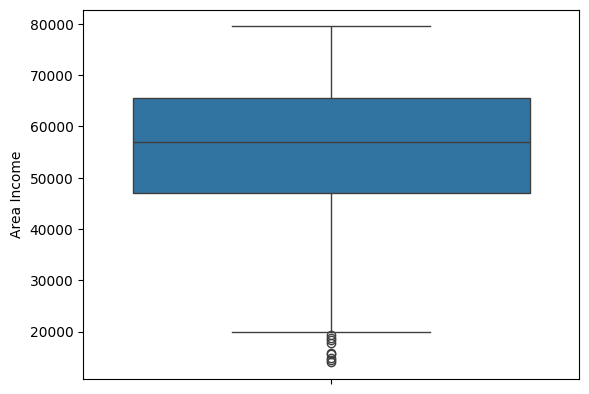

In [9]:
sns.boxplot(data=data['Area Income'])

In [10]:
#since area income columns has the column we try to remove these outliers
#finding IQR
percentile25=data['Area Income'].quantile(0.25)
percentile75=data['Area Income'].quantile(0.75)
IQR=percentile75-percentile25
print(IQR)

18438.832499999997


In [11]:
data['Area Income'].describe()

count     1000.000000
mean     55000.000080
std      13414.634022
min      13996.500000
25%      47031.802500
50%      57012.300000
75%      65470.635000
max      79484.800000
Name: Area Income, dtype: float64

In [12]:
lower_limit=percentile25-1.5*IQR
upper_limit=percentile75+1.5*IQR
lower_limit,upper_limit

(np.float64(19373.553750000003), np.float64(93128.88375))

Here upper limit is more than the max value thus there are no outliers in the upper region. Here the lower limit is more than the min value thus we see outliers in the lower part of the box plot.

In [13]:
upper_limit=data['Area Income'].max()

In [14]:
data[(data['Area Income']>upper_limit)|(data['Area Income']<lower_limit)]
len(data[(data['Area Income']>upper_limit)|(data['Area Income']<lower_limit)])


9

### **Trimming**

In [15]:
new_df = data[(data['Area Income'] >= lower_limit) & (data['Area Income'] <= upper_limit)]

In [16]:
print(len(new_df))

991


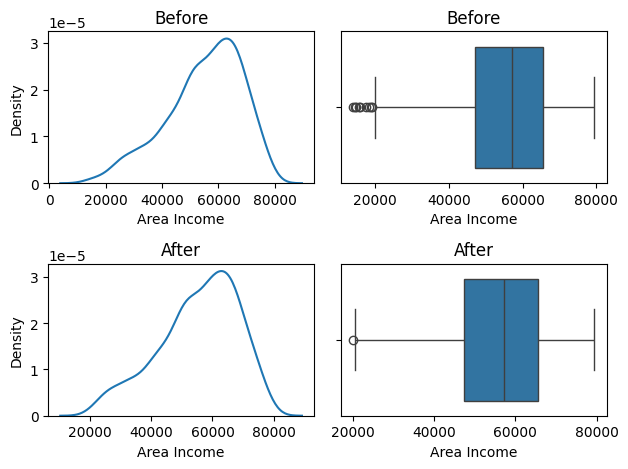

In [17]:
plt.subplot(221)
sns.kdeplot(data=data,x='Area Income')
plt.title('Before')
plt.subplot(222)
sns.boxplot(data=data,x='Area Income')
plt.title('Before')
plt.subplot(223)
sns.kdeplot(data=new_df,x='Area Income')
plt.title('After')
plt.subplot(224)
sns.boxplot(data=new_df,x='Area Income')
plt.title('After')
plt.tight_layout()

### **capping**

In [18]:
new_df=data.copy()
new_df['Area Income']=np.where(
    new_df['Area Income']>upper_limit,upper_limit,
    np.where(new_df['Area Income']<lower_limit,lower_limit,new_df['Area Income'])
)

In [19]:
new_df.shape

(1000, 4)

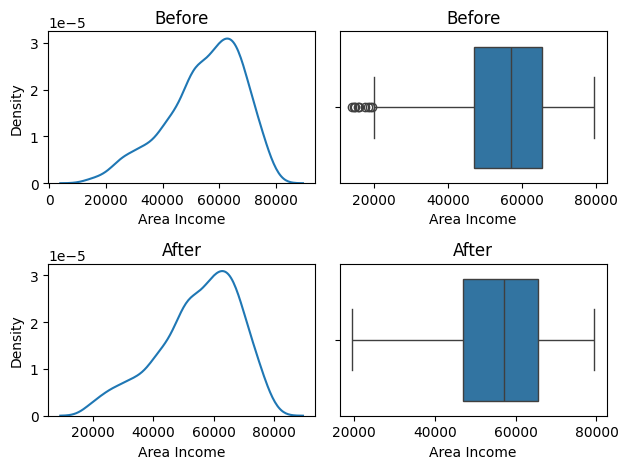

In [20]:
plt.subplot(221)
sns.kdeplot(data=data,x='Area Income')
plt.title('Before')
plt.subplot(222)
sns.boxplot(data=data,x='Area Income')
plt.title('Before')
plt.subplot(223)
sns.kdeplot(data=new_df,x='Area Income')
plt.title('After')
plt.subplot(224)
sns.boxplot(data=new_df,x='Area Income')
plt.title('After')
plt.tight_layout()

Here we see distribution of the data donot changes but the outliers are removed we can see taht through the box plot comparing before and after result.